In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3rAKozTp5vKr2981hco7")
project = rf.workspace("ml-n2gfx").project("modelo-de-deteccion-de-accidente")
version = project.version(4)
dataset = version.download("folder")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Modelo-de-deteccion-de-Accidente-4 in folder:: 100%|██████████| 3951/3951 [00:01<00:00, 3215.80it/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define la arquitectura de la CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    # Nuevas capas convolucionales adicionales
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Flatten(),

    # Capas densas adicionales
    Dense(512, activation='relu'),
    Dropout(0.5),  # Aumenta la regularización

    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')  # Salida para clasificación binaria
])

# Compila el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 111, 111, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 54, 54, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 26, 26, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 5, 5, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 1, 1, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,328,641 (16.51 MB)

 Trainable params: 4,325,633 (16.50 MB)

 Non-trainable params: 3,008 (11.75 KB)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directorios de las imágenes de entrenamiento y validación
# Define las rutas específicas para cada conjunto de datos
train_dir = "/content/Modelo-de-deteccion-de-Accidente-4/train"
val_dir = "/content/Modelo-de-deteccion-de-Accidente-4/valid"
test_dir = "/content/Modelo-de-deteccion-de-Accidente-4/test"


# Generador de imágenes con aumentación
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.15,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
                                   horizontal_flip=True, fill_mode="nearest")

val_datagen = ImageDataGenerator(rescale=1./255)

# Generadores de imágenes con aumentación y preprocesamiento
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224),
                                                    batch_size=32, class_mode='binary')

val_generator = val_datagen.flow_from_directory(val_dir, target_size=(224, 224),
                                                batch_size=32, class_mode='binary')



Found 2748 images belonging to 2 classes.
Found 789 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Asigna pesos según la proporción de clases
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(train_generator.classes),
                                     y=train_generator.classes)
class_weights_dict = dict(enumerate(class_weights))

history = model.fit(train_generator, epochs=50, validation_data=val_generator,
                    class_weight=class_weights_dict, callbacks=[early_stopping])



Epoch 1/50


Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.


86/86 ━━━━━━━━━━━━━━━━━━━━ 75s 647ms/step - accuracy: 0.6865 - loss: 0.7116 - val_accuracy: 0.5095 - val_loss: 1.2960
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 440ms/step - accuracy: 0.8120 - loss: 0.4351 - val_accuracy: 0.5095 - val_loss: 2.1469
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 443ms/step - accuracy: 0.8326 - loss: 0.3810 - val_accuracy: 0.5247 - val_loss: 1.3222
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 440ms/step - accuracy: 0.8729 - loss: 0.3281 - val_accuracy: 0.5412 - val_loss: 0.7446
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 426ms/step - accuracy: 0.8806 - loss: 0.3204 - val_accuracy: 0.8302 - val_loss: 0.3999
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 43s 458ms/step - accuracy: 0.9018 - loss: 0.2511 - val_accuracy: 0.9227 - val_loss: 0.1897
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 439ms/step - accuracy: 0.9295 - loss: 0.2057 - val_accuracy: 0.8264 - val_loss: 0.3612
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 439ms/step - accuracy: 0.9096 - loss: 0.2179 - val_accuracy: 0.865

In [ ]:
# Evaluación en el conjunto de prueba
test_loss, test_acc = model.evaluate(val_generator)
print(f"Accuracy en el conjunto de prueba: {test_acc:.2f}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.9919 - loss: 0.0213
Accuracy en el conjunto de prueba: 0.99


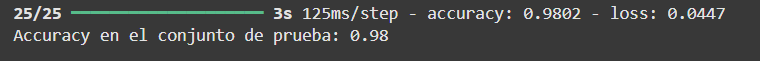

Accuracy 1

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step


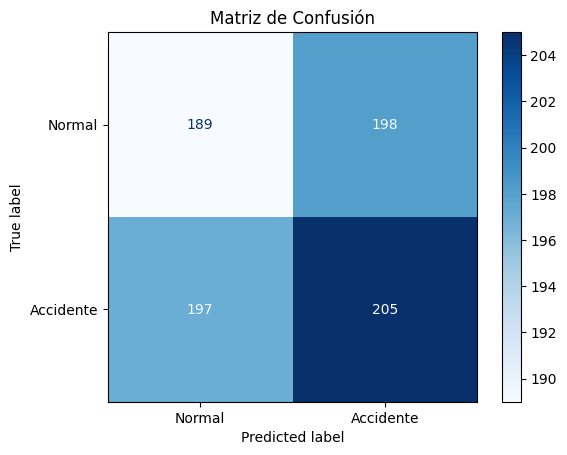

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Supongamos que tienes las predicciones de tu modelo y las etiquetas verdaderas
# Genera las predicciones con el modelo entrenado
predicciones = model.predict(val_generator)
y_pred = np.round(predicciones).astype(int)  # Redondea para obtener etiquetas binarias
y_true = val_generator.classes  # Etiquetas verdaderas

# Calcula la matriz de confusión
cm = confusion_matrix(y_true, y_pred)
labels = ['Normal', 'Accidente']  # Etiquetas de tus clases

# Dibuja la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Matriz de Confusión")
plt.show()


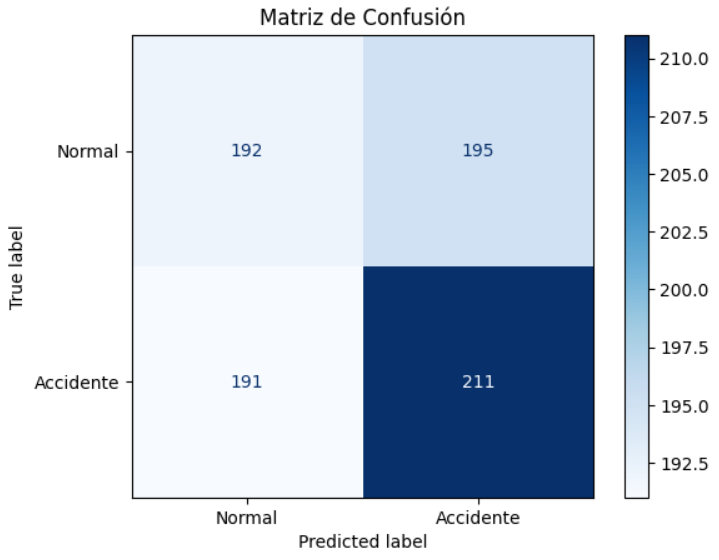
Matriz de confusion 1

In [ ]:
from sklearn.metrics import recall_score
import numpy as np

# Hacer las predicciones
y_pred = model.predict(val_generator)
y_pred = np.argmax(y_pred, axis=-1)  # Si es clasificación multiclase, toma la clase con mayor probabilidad

# Obtener las etiquetas reales
y_true = val_generator.classes

# Calcular recall
recall = recall_score(y_true, y_pred, average='macro')  # O 'micro', 'weighted', según lo necesites

# Mostrar resultados
test_loss, test_acc = model.evaluate(val_generator)
print(f"Accuracy en el conjunto de prueba: {test_acc:.2f}")
print(f"Recall en el conjunto de prueba: {recall:.2f}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9796 - loss: 0.0449
Accuracy en el conjunto de prueba: 0.99
Recall en el conjunto de prueba: 0.50


In [ ]:
# Generador de imágenes de prueba (sin aumentación, solo reescalado)
test_generator = val_datagen.flow_from_directory(test_dir, target_size=(224, 224),
                                                 batch_size=32, class_mode='binary',
                                                 shuffle=False)


Found 403 images belonging to 2 classes.


In [ ]:
import numpy as np
from sklearn.metrics import recall_score, accuracy_score, precision_score

# Define tu umbral personalizado
umbral_personalizado = 0.4

# Realiza las predicciones en el conjunto de test
probabilidades = model.predict(test_generator)  # O usa X_test si es el caso

# Aplica el umbral personalizado para clasificar
predicciones_personalizadas = (probabilidades >= umbral_personalizado).astype(int)

# Obtén las etiquetas verdaderas del conjunto de test
etiquetas_verdaderas = test_generator.classes  # O usa y_test si es el caso

# Calcula las métricas para evaluar el rendimiento del modelo con el umbral personalizado
recall = recall_score(etiquetas_verdaderas, predicciones_personalizadas)
precision = precision_score(etiquetas_verdaderas, predicciones_personalizadas)
accuracy = accuracy_score(etiquetas_verdaderas, predicciones_personalizadas)

print(f'Recall con umbral personalizado de {umbral_personalizado}: {recall:.4f}')
print(f'Precisión con umbral personalizado de {umbral_personalizado}: {precision:.4f}')
print(f'Exactitud con umbral personalizado de {umbral_personalizado}: {accuracy:.4f}')


 1/13 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step
Recall con umbral personalizado de 0.4: 0.9857
Precisión con umbral personalizado de 0.4: 0.9904
Exactitud con umbral personalizado de 0.4: 0.9876


In [ ]:
# Generador de datos para el conjunto de test
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 403 images belonging to 2 classes.


In [ ]:
# Obtener las probabilidades predichas
probabilidades_test = model.predict(test_generator)

# Aplicar el umbral personalizado para clasificar
umbral_personalizado = 0.4  # Puedes ajustar este umbral si es necesario
predicciones_test = (probabilidades_test >= umbral_personalizado).astype(int)


 2/13 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step 

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Obtener las etiquetas verdaderas del generador
etiquetas_test = test_generator.classes

# Calcular las métricas
recall_test = recall_score(etiquetas_test, predicciones_test)
precision_test = precision_score(etiquetas_test, predicciones_test)
accuracy_test = accuracy_score(etiquetas_test, predicciones_test)

print(f"Recall en el conjunto de test con umbral personalizado de {umbral_personalizado}: {recall_test:.4f}")
print(f"Precisión en el conjunto de test con umbral personalizado de {umbral_personalizado}: {precision_test:.4f}")
print(f"Exactitud en el conjunto de test con umbral personalizado de {umbral_personalizado}: {accuracy_test:.4f}")


Recall en el conjunto de test con umbral personalizado de 0.4: 0.9857
Precisión en el conjunto de test con umbral personalizado de 0.4: 0.9904
Exactitud en el conjunto de test con umbral personalizado de 0.4: 0.9876


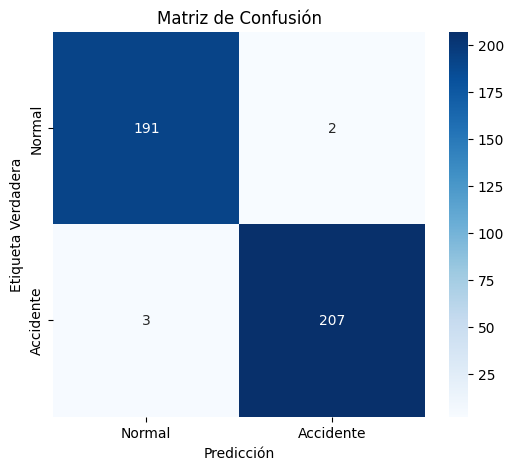

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generar la matriz de confusión
cm = confusion_matrix(etiquetas_test, predicciones_test)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Accidente'], yticklabels=['Normal', 'Accidente'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image


def predict_frame(frame_path, umbral=0.4):  # Ajusta el umbral según sea necesario
    img = image.load_img(frame_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    return "Accidente" if prediction[0][0] > umbral else "No Accidente"




predict_frame("/content/image4.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


'Accidente'

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Definir diferentes umbrales
umbral_values = np.arange(0.0, 1.0, 0.05)
mejor_umbral = 0
mejor_f1_score = 0

for umbral in umbral_values:
    predicciones_personalizadas = (probabilidades >= umbral).astype(int)
    f1 = f1_score(etiquetas_verdaderas, predicciones_personalizadas)

    if f1 > mejor_f1_score:
        mejor_f1_score = f1
        mejor_umbral = umbral

# Usar el mejor umbral
print(f"Mejor umbral: {mejor_umbral} con F1-score: {mejor_f1_score:.4f}")

# Recalcular las métricas usando el mejor umbral
predicciones_personalizadas = (probabilidades >= mejor_umbral).astype(int)
recall = recall_score(etiquetas_verdaderas, predicciones_personalizadas)
precision = precision_score(etiquetas_verdaderas, predicciones_personalizadas)
accuracy = accuracy_score(etiquetas_verdaderas, predicciones_personalizadas)

print(f'Recall: {recall:.4f}')
print(f'Precisión: {precision:.4f}')
print(f'Exactitud: {accuracy:.4f}')



Mejor umbral: 0.4 con F1-score: 0.9857
Recall: 0.9857
Precisión: 0.9857
Exactitud: 0.9851
